<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_Deaths_Hubei_Italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [3]:
cases.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264


In [4]:
deaths.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19


In [0]:
index_Hubei = deaths[deaths['Province/State'] == 'Hubei'].index[0]
index_Italy = deaths[deaths['Country/Region'] == 'Italy'].index[0]

In [6]:
index_Hubei, index_Italy

(62, 137)

In [0]:
Hubei_deaths = deaths.iloc[index_Hubei,4:]
Italy_deaths = deaths.iloc[index_Italy,4:]

In [0]:
Hubei_cases = cases.iloc[index_Hubei,4:]
Italy_cases = cases.iloc[index_Italy,4:]

In [0]:
Italy_new_cases = [t - s for s, t in zip(Italy_cases, Italy_cases[1:])]

In [0]:
Italy_new = pd.Series()
for i, v in enumerate(Italy_new_cases):
  Italy_new[(pd.to_datetime('2020-01-22') + pd.DateOffset(i+1)).strftime('%y-%m-%d')] = v

In [11]:
Italy_new.head()

20-01-23    0
20-01-24    0
20-01-25    0
20-01-26    0
20-01-27    0
dtype: int64

In [0]:
Italy_new_TP = Italy_new[Italy_new>100]

In [13]:
Italy_new_TP[:3]

20-02-26    131
20-02-27    202
20-02-28    233
dtype: int64

In [0]:
Italy_TP_date = '2020-02-26'
Italy_lockdown = '2020-03-10'
Hubei_lockdown = '2020-01-24'

In [0]:
Italy_deaths = Italy_deaths[35:]

In [0]:
Hubei_gap = (pd.to_datetime(Hubei_lockdown)-pd.to_datetime('2020-01-21')).days

In [0]:
Italy_gap = (pd.to_datetime(Italy_lockdown)-pd.to_datetime(Italy_TP_date)).days

In [18]:
Hubei_gap, Italy_gap

(3, 13)

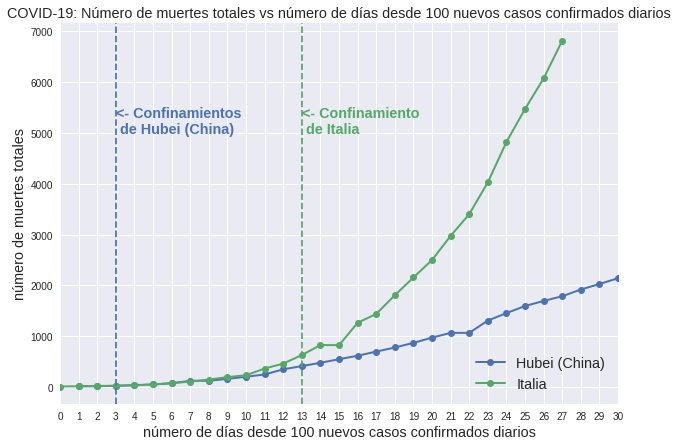

In [19]:
fig, ax = plt.subplots(figsize=(10,7))

plt.plot(np.arange(1, len(Hubei_deaths), 1), Hubei_deaths[:-1], label='Hubei (China)', linewidth=2, color='C0', marker='o')
plt.plot(np.arange(len(Italy_deaths)), Italy_deaths, label='Italia', linewidth=2, color='C1', marker='o')

plt.axvline(Hubei_gap, color='C0', linestyle='dashed')
plt.axvline(Italy_gap, color='C1', linestyle='dashed')

plt.annotate('<- Confinamientos\n de Hubei (China)', (Hubei_gap,5000.0), color='C0', fontsize='x-large', fontweight='bold')
plt.annotate('<- Confinamiento\n de Italia', (Italy_gap,5000.0), color='C1', fontsize='x-large', fontweight='bold')

ax.set_title('COVID-19: Número de muertes totales vs número de días desde 100 nuevos casos confirmados diarios', fontsize='x-large')
ax.set_xlabel('número de días desde 100 nuevos casos confirmados diarios', fontsize='x-large')
ax.set_ylabel('número de muertes totales', fontsize='x-large')
ax.set_xticks(np.arange(len(Hubei_cases)))
# plt.yscale("log")
plt.xlim(0,30)
plt.legend(fontsize='x-large')
plt.show()